In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#Now we are going to Analysis and predict the out come of new data

In [5]:
X=df.drop('sales',axis=1)

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y=df['sales']

In [8]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
#poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [11]:
#poly_features =poly_converter.fit_transform(X)

In [12]:
#poly_features[0]

In [13]:
X.iloc[[0]]

,TV,radio,newspaper
0,230.1,37.8,69.2


In [14]:
#choosing the best degree of polynomial

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)

    train_predit = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_rsme = np.sqrt(mean_squared_error(y_train,train_predit))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predict))

    train_rmse_errors.append(train_rsme)
    test_rmse_errors.append(test_rmse)

In [18]:
#plotting two errors for findings best degree

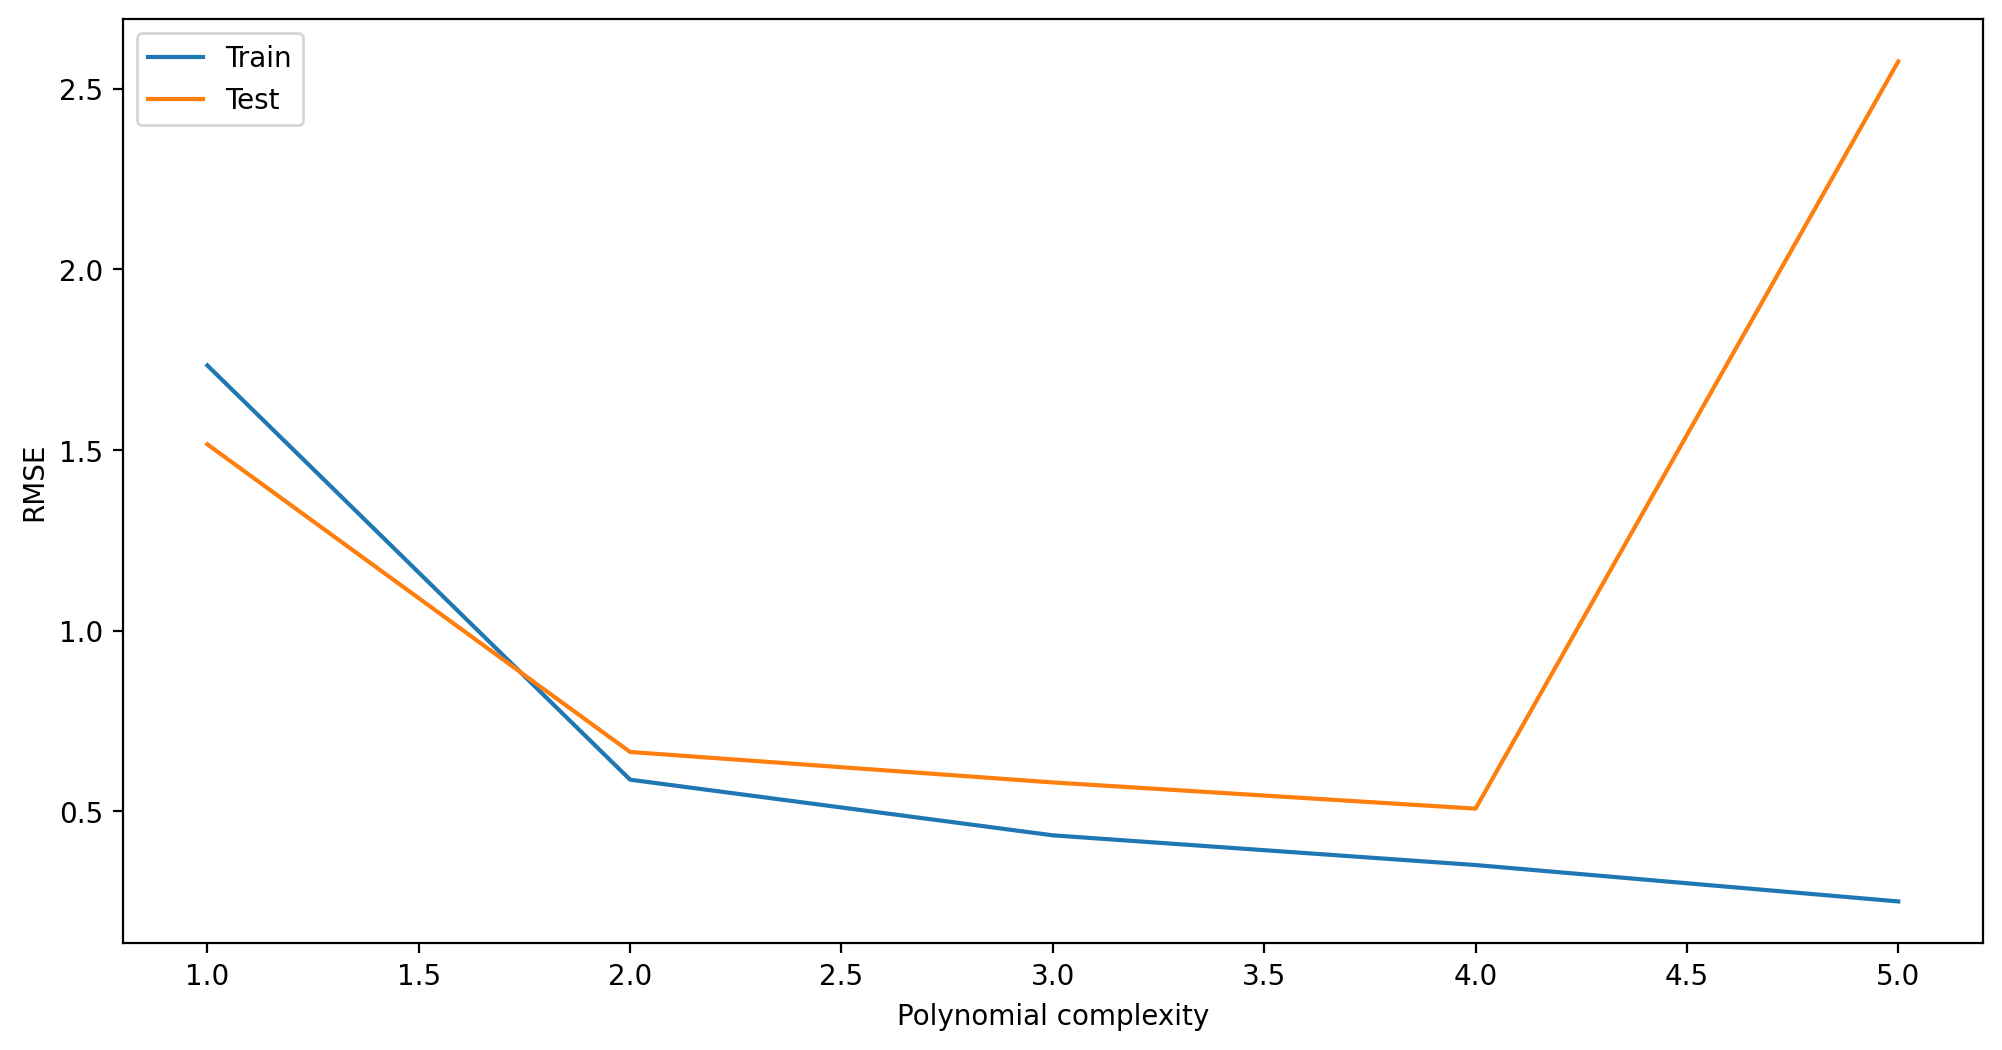

In [19]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(1,6),train_rmse_errors[:5],label='Train')
plt.plot(range(1,6),test_rmse_errors[:5],label='Test')
plt.xlabel('Polynomial complexity')
plt.ylabel('RMSE')
plt.legend();

plt.savefig('findingBestDegree.png')

In [20]:
#comparing above figure,I concluded that degree 2,3 and 4 are best degree

In [21]:
test_rmse_errors[1:4]

[0.6646431757269, 0.5803286825219469, 0.5077742640851456]

In [22]:
train_rmse_errors[1:4]

[0.5879574085292234, 0.43393443569020657, 0.35170836883993556]

In [23]:
#now i am choosing the 3 as degree for polynoimal features

In [24]:
poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [25]:
poly_features=poly_converter.fit_transform(X)

In [26]:
final_model=LinearRegression()

In [27]:
final_model.fit(poly_features,y)

LinearRegression()

In [28]:
#saving model and converting(dump and load)

In [29]:
from joblib import dump,load

In [30]:
dump(final_model,'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [31]:
dump(poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [32]:
#deployment and predictions

In [33]:
loaded_poly=load('poly_converter.joblib')

In [34]:
loaded_model=load('sales_poly_model.joblib')

In [35]:
data=[[220,36,18],[145,45,12]]

In [36]:
data_poly=loaded_poly.transform(data)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [37]:
final_model.predict(data_poly)

array([20.47978063, 19.1602229 ])